# 13 Feed Forward Neural Network

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [14]:
input_size = 784
hidden_size = 100
num_classes = 10 
nepochs = 4
batch_size = 100
lr = 0.001

In [3]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False,
                                           transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                           shuffle=False)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


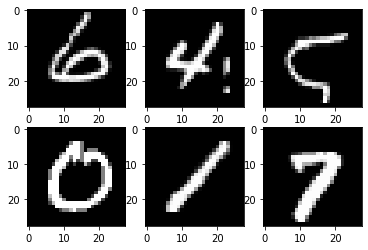

In [5]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.l2(x)
        return x 

In [16]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [17]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [18]:
n_total_steps = len(train_loader)

for epoch in range(nepochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 784)
        
        pred = model(images)
        loss = criteria(pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 100 == 99:
            print(f'epoch {epoch+1} / {nepochs}, step {i+1:4d}/{n_total_steps}, loss {loss.item():.5f}')

epoch 1 / 4, step  100/600, loss 0.40087
epoch 1 / 4, step  200/600, loss 0.35960
epoch 1 / 4, step  300/600, loss 0.31126
epoch 1 / 4, step  400/600, loss 0.25708
epoch 1 / 4, step  500/600, loss 0.42626
epoch 1 / 4, step  600/600, loss 0.26082
epoch 2 / 4, step  100/600, loss 0.16104
epoch 2 / 4, step  200/600, loss 0.14480
epoch 2 / 4, step  300/600, loss 0.14889
epoch 2 / 4, step  400/600, loss 0.15828
epoch 2 / 4, step  500/600, loss 0.12436
epoch 2 / 4, step  600/600, loss 0.21079
epoch 3 / 4, step  100/600, loss 0.12531
epoch 3 / 4, step  200/600, loss 0.17674
epoch 3 / 4, step  300/600, loss 0.32128
epoch 3 / 4, step  400/600, loss 0.10779
epoch 3 / 4, step  500/600, loss 0.15345
epoch 3 / 4, step  600/600, loss 0.08403
epoch 4 / 4, step  100/600, loss 0.12605
epoch 4 / 4, step  200/600, loss 0.11667
epoch 4 / 4, step  300/600, loss 0.10507
epoch 4 / 4, step  400/600, loss 0.17825
epoch 4 / 4, step  500/600, loss 0.04760
epoch 4 / 4, step  600/600, loss 0.09768


In [19]:
with torch.no_grad():
    correct = 0
    samples = 0 
    for images, labels in test_loader:
        images = images.reshape(-1, 784)
        pred = model(images)
        
        _, predictions = torch.max(pred, 1)
        samples += labels.shape[0]
        correct += (predictions == labels).sum().item()

In [21]:
print(f'Test acurracy: {correct / samples * 100:.2f}%')

Test acurracy: 96.51%
